System information (for reproducibility):

In [1]:
versioninfo()

Julia Version 1.10.5
Commit 6f3fdf7b362 (2024-08-27 14:19 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (arm64-apple-darwin22.4.0)
  CPU: 12 × Apple M2 Max
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, apple-m1)
Threads: 8 default, 0 interactive, 4 GC (on 8 virtual cores)
Environment:
  JULIA_EDITOR = code
  JULIA_NUM_THREADS = 8


Load packages:

In [2]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()
Pkg.status()

  Activating project at `~/Documents/github.com/ucla-biostat-216/2024fall/slides/02-vector`


Status `~/Documents/github.com/ucla-biostat-216/2024fall/slides/02-vector/Project.toml`
  [6e4b80f9] BenchmarkTools v1.5.0
  [7073ff75] IJulia v1.25.0
  [b964fa9f] LaTeXStrings v1.3.1
  [91a5bcdd] Plots v1.40.8
  [37e2e46d] LinearAlgebra
  [9a3f8284] Random
  [10745b16] Statistics v1.10.0


In [3]:
using BenchmarkTools, LaTeXStrings, LinearAlgebra, Plots, Random, Statistics
Random.seed!(216)

TaskLocalRNG()

# Vectors (BV Chapters 1, 3, 5)

## Notation

- A (column) vector $\mathbf{x} \in \mathbb{R}^n$:
$$
\mathbf{x} = \begin{pmatrix}
x_1 \\ x_2 \\ \vdots \\ x_n
\end{pmatrix} = (x_1, x_2, \ldots, x_n).
$$  
  - $n$ is the **dimension** (or **length** or **size**) of the vector. 

  - $x_i$ is the $i$-th **entry** (or **element** or **component** or **coefficient**) of $\mathbf{x}$. 

  - A vector of length $n$ is called an **$n$-vector**.

- A row vector $\mathbf{x}' = (x_1 \, x_2 \, \ldots x_n)$ (without commas).

In [4]:
# a (column) vector in Julia
x = [1, -1, 2, 0, 3]

5-element Vector{Int64}:
  1
 -1
  2
  0
  3

In [5]:
# row vector
x'

1×5 adjoint(::Vector{Int64}) with eltype Int64:
 1  -1  2  0  3

- Subvector: $\mathbf{x}_{2:4} = \begin{pmatrix} x_2 \\ x_3 \\ x_4 \end{pmatrix}$.

In [6]:
x[2:4]

3-element Vector{Int64}:
 -1
  2
  0

- Stacked vector:
$$
\mathbf{x} = \begin{pmatrix}
\mathbf{y} \\ \mathbf{z}
\end{pmatrix} = (\mathbf{y}, \mathbf{z}) = \begin{pmatrix}
y_1 \\ \vdots \\ y_m \\ z_1 \\ \vdots \\ z_n
\end{pmatrix}.
$$

In [7]:
y = [1, 2, 3]
z = [4, 5]
x = [y; z]

5-element Vector{Int64}:
 1
 2
 3
 4
 5

## Some special vectors

- Zero vector: 
$$
\mathbf{0}_n = \begin{pmatrix} 0 \\ \vdots \\ 0 \end{pmatrix}.
$$
The subscript denotes the length of the vector; it sometimes is omitted if obvious from context.

In [8]:
zeros(5)

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

- One vector: 
$$
\mathbf{1}_n = \begin{pmatrix} 1 \\ \vdots \\ 1 \end{pmatrix}.
$$

In [9]:
ones(5)

5-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0

- The unit vector (or elementary basis vector), $\mathbf{e}_i$, has all zero entries except the $i$-th entry being 1. Note the length of $\mathbf{e}_i$ is often implied by context.
$$
\mathbf{e}_1 = \begin{pmatrix}
1 \\ 0 \\ 0 \\ \vdots \\ 0
\end{pmatrix}, \quad \mathbf{e}_2 = \begin{pmatrix}
0 \\ 1 \\ 0 \\ \vdots \\ 0
\end{pmatrix}, \quad \ldots, \quad \mathbf{e}_n = \begin{pmatrix}
0 \\ 0 \\ \vdots \\ 0 \\ 1
\end{pmatrix}.
$$

In [10]:
# define a unit vector by comprehension
e3 = [i == 3 ? 1 : 0 for i in 1:5]

5-element Vector{Int64}:
 0
 0
 1
 0
 0

## Vector operations

- **Vector addition** (or **elementwise addition**) and **vector substraction** (or **elementwise substraction**). For two vectors $\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$ (of same length),
$$
\mathbf{x} + \mathbf{y} = \begin{pmatrix}
x_1 + y_1 \\ \vdots \\ x_n + y_n
\end{pmatrix}, \quad \mathbf{x} - \mathbf{y} = \begin{pmatrix}
x_1 - y_1 \\ \vdots \\ x_n - y_n
\end{pmatrix}.
$$

In [11]:
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 9, 10]
x + y

5-element Vector{Int64}:
  7
  9
 11
 13
 15

In [12]:
x - y

5-element Vector{Int64}:
 -5
 -5
 -5
 -5
 -5

- **Scalar-vector multiplication**. For a scalar $\alpha \in \mathbb{R}$ and a vector $\mathbf{x} \in \mathbb{R}^n$,
$$
\alpha \mathbf{x} = \begin{pmatrix}
\alpha x_1 \\ \alpha x_2 \\ \vdots \\ \alpha x_n
\end{pmatrix}.
$$

In [13]:
α = 0.5
x = [1, 2, 3, 4, 5]
α * x

5-element Vector{Float64}:
 0.5
 1.0
 1.5
 2.0
 2.5

- **Elementwise multiplication** or **Hadamard product**. For two vectors $\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$ (of same length),
$$
\mathbf{x} \circ \mathbf{y} = \begin{pmatrix}
x_1 y_1 \\ \vdots \\ x_n y_n
\end{pmatrix}.
$$

In [14]:
# in Julia, dot operation is elementwise operation
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 9, 10]
x .* y

5-element Vector{Int64}:
  6
 14
 24
 36
 50

- For scalars $\alpha_1, \ldots, \alpha_k \in \mathbb{R}$ and vectors $\mathbf{x}_1, \ldots, \mathbf{x}_k \in \mathbb{R}^n$, the **linear combination**
$$
\sum_{i=1}^k \alpha_i \mathbf{x}_i = \alpha_1 \mathbf{x}_1 + \cdots + \alpha_k \mathbf{x}_k
$$
is a sum of scalar-vector products. 

In [15]:
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 9, 10]
1 * x + 0.5 * y

5-element Vector{Float64}:
  4.0
  5.5
  7.0
  8.5
 10.0

- **Vector transpose**:
$$
\mathbf{x}' = \begin{pmatrix} x_1 \\ \vdots \\ x_n \end{pmatrix}' = (x_1 \, \ldots \, x_n).
$$

Properties:
    
1. $(\mathbf{x}')' = \mathbf{x}$.  
    
2. Transposition is a linear operator: $(\alpha \mathbf{x} + \beta \mathbf{y})' = \alpha \mathbf{x}' + \beta \mathbf{y}'$.  

Superscript $^t$ or $^T$ is also commonly used to denote transpose: $\mathbf{x}^t$, $\mathbf{x}^T$.

- The **inner product** or **dot product** between two vectors $\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$ is
$$
\mathbf{x}' \mathbf{y} = (x_1 \, \ldots \, x_n) \begin{pmatrix} y_1 \\ \vdots \\ y_n \end{pmatrix} = x_1 y_1 + \cdots + x_n y_n.
$$
Other notations for inner products: $\langle \mathbf{x}, \mathbf{y} \rangle$, $\sum_{i=1}^n x_i y_i$.

In [16]:
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 9, 10]
x'y

130

In [17]:
# dot function is avaiable from the standard library Linear Algebra
dot(x, y)

130

Properties of inner product: 

1. $\mathbf{x}' \mathbf{x} = x_1^2 + \cdots + x_n^2 \ge 0$.

2. $\mathbf{x}' \mathbf{x} = 0$ if and only if $\mathbf{x} = \mathbf{0}$.

3. Commutative: $\mathbf{x}' \mathbf{y} = \mathbf{y}' \mathbf{x}$.

4. Associative with scalar multiplication: $(\alpha \mathbf{x})' \mathbf{y} = \alpha (\mathbf{x}' \mathbf{y}) = \mathbf{x}' (\alpha \mathbf{y})$. 

5. Distributive with vector addition: $(\mathbf{x} + \mathbf{y})' \mathbf{z} = \mathbf{x}' \mathbf{z} + \mathbf{y}' \mathbf{z}$.

Examples of inner product. **In class exercises**: express the following quantities using vector inner products of a vector $\mathbf{x} \in \mathbb{R}^n$ and another vector.

1. Individual component: $x_i = \rule[-0.1cm]{1cm}{0.15mm}$.

2. Differencing: $x_i - x_j = \rule[-0.1cm]{1cm}{0.15mm}$.

3. Sum: $x_1 + \cdots + x_n = \rule[-0.1cm]{1cm}{0.15mm}$.

4. Average: $(x_1 + \cdots + x_n) / n = \rule[-0.1cm]{1cm}{0.15mm}$.

## Computer representation of numbers and vectors

- Real numbers are represented as the **floating point numbers** in computers.

- (Double precision) floating point numbers approximate real numbers to an accuracy of 15-16 digits.

- One (double precision) floating point number takes 64 bits (0s and 1s), or 8 bytes.

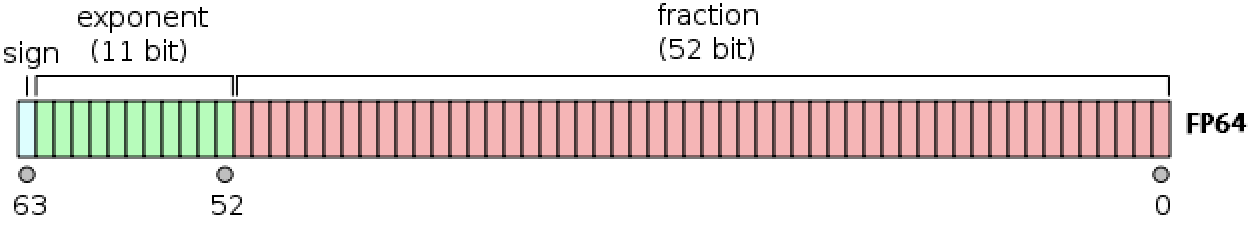

- An $n$-vector requires $8n$ bytes to store.

## Computational complexity of vector operations

- One **floating point operation** (flop) is one basic arithmetic operation in $\mathbb{R}$ or $\mathbb{C}$: $+, -, *, /, \sqrt, ...$

- The **flop count** or **operation count** is the total number of flops in an algorithm.

- A (very) crude predictor of run time of the algorithm is 
$$
\text{run time} \approx \frac{\text{flop count}}{\text{computer speed (flops/second)}}.
$$

- **Dominant term**: the highest-order term in the flop count.
$$
\frac 13 n^3 + 100 n^2 + 10n + 5 \approx \frac 13 n^3.
$$

- **Order**: the power in the dominant term.
$$
\frac 13 n^3 + 100 n^2 + 10n + 5 = \text{order } n^3 = O(n^3).
$$


- **In-class exercises**. Assume vectors are all of length $n$. Give the flop counts of the following operations.

    1. Sum the elements of a vector: $\rule[-0.1cm]{1cm}{0.15mm}$ flops.
    
    2. Vector addition and substraction: $\rule[-0.1cm]{1cm}{0.15mm}$ flops.

    3. Scalar multiplication: $\rule[-0.1cm]{1cm}{0.15mm}$ flops.

    4. Elementwise multiplication: $\rule[-0.1cm]{1cm}{0.15mm}$ flops.

    5. Inner product: $\rule[-0.1cm]{1cm}{0.15mm}$ flops.  
    
    6. Norm of a vector: $\rule[-0.1cm]{1cm}{0.15mm}$ flops.
    
- These vector operations are all order $n$ algorithms.

In [18]:
# info about my computer 
versioninfo(verbose = true)

Julia Version 1.10.5
Commit 6f3fdf7b362 (2024-08-27 14:19 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (arm64-apple-darwin22.4.0)
  uname: Darwin 23.6.0 Darwin Kernel Version 23.6.0: Mon Jul 29 21:13:04 PDT 2024; root:xnu-10063.141.2~1/RELEASE_ARM64_T6020 arm64 arm
  CPU: Apple M2 Max: 
                 speed         user         nice          sys         idle          irq
       #1-12  2400 MHz    2895944 s          0 s    1748630 s   43959509 s          0 s
  Memory: 96.0 GB (27787.6875 MB free)
  Uptime: 1.765265e6 sec
  Load Avg:  4.4013671875  3.087890625  2.81640625
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, apple-m1)
Threads: 8 default, 0 interactive, 4 GC (on 8 virtual cores)
Environment:
  JULIA_EDITOR = code
  JULIA_NUM_THREADS = 8
  XPC_FLAGS = 0x0
  PATH = /Users/huazhou/.julia/juliaup/julia-1.10.5+0.aarch64.apple.darwin14/bin:/Users/huazhou/.julia/conda/3/aarch64/bin:/Users/huazhou/.juliaup/bin:/Users/huazho

Assume that one Apple M2 performance core can do 4 double-precision flops per CPU cylce (?) at 2.4GHz (cycles/second). Then the theoretical throughput of a single performance core on my laptop is
$$
4 \times 2.4 \times 10^9 = 9.6 \times 10^9 \text{ flops/second} = 9.6 \text{ GFLOPS}
$$
in double precision. I estimate my computer takes about
$$
\frac{10^7 - 1}{9.6 \times 10^9} \approx 0.001042 \text{ seconds} = 1.042 \text{ milliseconds} = 1042 \text{ micro seconds}
$$
to sum a vector of length $n = 10^7$ using a single performance core.

In [19]:
# the actual run time
n = 10^7
x = randn(n)
sum(x) # compile
@time sum(x);

  0.001567 seconds (1 allocation: 16 bytes)


In [20]:
@benchmark sum($x)

BenchmarkTools.Trial: 3210 samples with 1 evaluation.
 Range (min … max):  1.475 ms …  1.854 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.561 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.551 ms ± 49.857 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

   ▁                            █                             
  ▅█▄▄▃▃▃▃▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▆█▇▄▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▂▂▂▂▂ ▃
  1.48 ms        Histogram: frequency by time        1.69 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

## Norm, distance, angle

- The **Euclidean norm** or **L2 norm** of a vector $\mathbf{x} \in \mathbb{R}^n$ is
$$
\|\mathbf{x}\| = \|\mathbf{x}\|_2 = (\mathbf{x}'\mathbf{x})^{1/2} = \sqrt{x_1^2 + \cdots + x_n^2}.
$$
The Euclidean/L2 norm captures the Euclidean length of the vector.

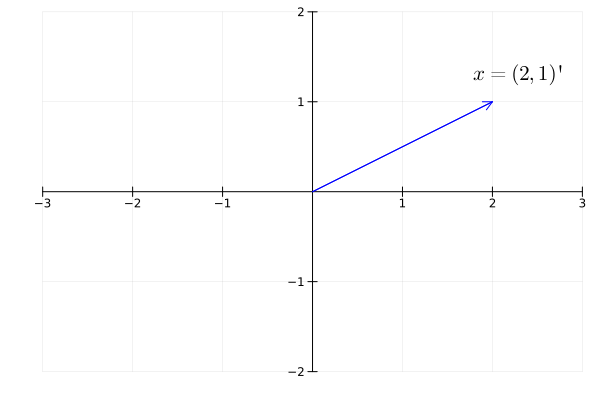

In [21]:
#| code-fold: true

x = [2, 1]

plot([0; x[1]], [0; x[2]], arrow = true, color = :blue,
    legend = :none, xlims = (-3, 3), ylims = (-2, 2),
    annotations = [((x .+ 0.3)..., L"x=(%$(x[1]), %$(x[2]))'")],
    xticks = -3:1:3, yticks = -2:1:2,
    framestyle = :origin,
    aspect_ratio = :equal)

- The **L1 norm** of a vector $\mathbf{x} \in \mathbb{R}^n$ is
$$
\|\mathbf{x}\|_1 = |x_1| + \cdots + |x_n|.
$$
Also known as **Manhattan Distance** or **Taxicab norm**. The L1 norm is the distance you have to travel between the origin $\mathbf{0}_n$ to the destination $\mathbf{x} = (x_1, \ldots, x_n)$, in a way that resembles how a taxicab drives between city blocks to arrive at its destination.

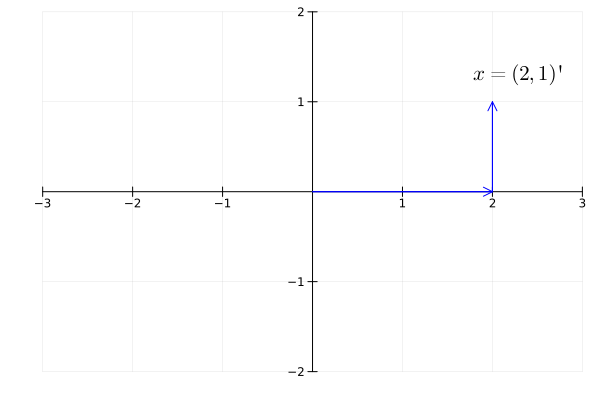

In [22]:
#| code-fold: true

x = [2, 1]

plot([0 x[1]; x[1] x[1]], [0 0; 0 x[2]], arrow = true, color = :blue,
    legend = :none, xlims = (-3, 3), ylims = (-2, 2),
    annotations = [((x .+ 0.3)..., L"x=(%$(x[1]), %$(x[2]))'")],
    xticks = -3:1:3, yticks = -2:1:2,
    framestyle = :origin,
    aspect_ratio = :equal)

- Properties of L2 norm.

    1. Positive definiteness: $\|\mathbf{x}\| \ge 0$ for any vector $\mathbf{x}$. $\|\mathbf{x}\| = 0$ if and only if $\mathbf{x}=\mathbf{0}$.
    
    2. Homogeneity: $\|\alpha \mathbf{x}\| = |\alpha| \|\mathbf{x}\|$ for any scalar $\alpha$ and vector $\mathbf{x}$.  
    
    3. Triangle inequality: $\|\mathbf{x} + \mathbf{y}\| \le \|\mathbf{x}\| + \|\mathbf{y}\|$ for any $\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$.  
    Proof: use Cauchy-Schwartz inequality. TODO in class.
    
    4. **Cauchy-Schwarz inequality**: $|\mathbf{x}' \mathbf{y}| \le \|\mathbf{x}\| \|\mathbf{y}\|$ for any $\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$. The equality holds when (1) $\mathbf{x} = \mathbf{0}$ or $\mathbf{y}=\mathbf{0}$ or (2) $\mathbf{x} \ne \mathbf{0}$, $\mathbf{y} \ne \mathbf{0}$, and $\mathbf{x} = \alpha \mathbf{y}$ for some $\alpha \ne 0$.
    
    Proof: The function $f(t) = \|\mathbf{x} - t \mathbf{y}\|_2^2 = \|\mathbf{x}\|_2^2 - 2t (\mathbf{x}' \mathbf{y}) + t^2\|\mathbf{y}\|_2^2$ is minimized at $t^\star =(\mathbf{x}'\mathbf{y}) / \|\mathbf{y}\|^2$ with minimal value $0 \le f(t^\star) = \|\mathbf{x}\|^2 - (\mathbf{x}'\mathbf{y})^2 / \|\mathbf{y}\|^2$.

    There are at least 5 other proofs of CS inequality on [Wikipedia](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Schwarz_inequality).

The first three properties are the defining properties of any vector norm.

**Homework 1 (BV 3.5):** Show the three properties for the L1 norm.

**Homework 1 (BV 3.5):** Show the three properties for the L-infinity norm: $\|\mathbf{x}\|_\infty = \max_i |x_i|$.

**In-class exericse:** Which property is violated for the L0 "norm": $\|\mathbf{x}\|_0 = \sum_i \mathbb{1}_{x_i \ne 0} = \text{number of non-zero elements in } \mathbf{x}$.

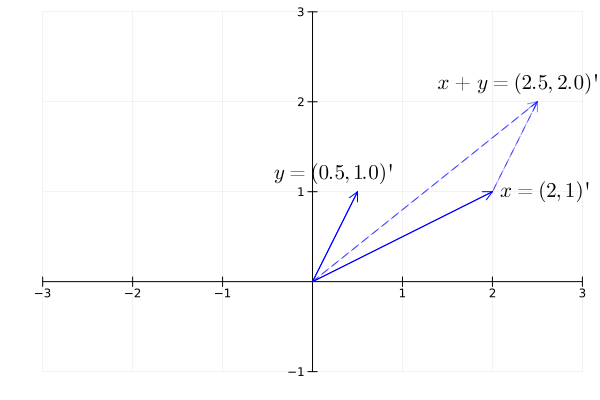

In [23]:
#| code-fold: true

x = [2, 1]
y = [0.5, 1]

plot([0 0; x[1] y[1]], [0 0; x[2] y[2]], arrow = true, color = :blue,
    legend = :none, xlims = (-3, 3), ylims = (-1, 3),
    annotations = [(x[1] + 0.6, x[2], L"x=(%$(x[1]), %$(x[2]))'"),
        (y[1] - 0.25, y[2] + 0.2, L"y=(%$(y[1]), %$(y[2]))'")],
    xticks = -3:1:3, yticks = -1:1:3,
    framestyle = :origin,
    aspect_ratio = :equal)

plot!([x[1] 0; x[1] + y[1] x[1] + y[1]], [x[2] 0; x[2] + y[2] x[2] + y[2]], 
    arrow = true, linestyle = :dash, color = :blue, linealpha = 0.5,
    annotations = [(x[1] + y[1] - 0.2, 
                    x[2] + y[2] + 0.2, 
                    L"x+y=(%$(x[1] + y[1]), %$(x[2] + y[2]))'")])

In [24]:
# check triangular inequality on random vectors
@show x = randn(5)
@show y = randn(5)
@show norm(x + y)
@show norm(x) + norm(y)
@show norm(x + y) ≤ norm(x) + norm(y)

x = randn(5) = [-1.3464245467948444, 0.4734187387682174, -0.26763026759772346, 1.0887134914151122, -0.44435104736444664]
y = randn(5) = [-0.047806758756256305, 0.7044686500166222, -0.16623618980244073, 0.20436490951615896, -0.41108911514080376]
norm(x + y) = 2.4337973127349875
norm(x) + norm(y) = 2.726977870355726
norm(x + y) ≤ norm(x) + norm(y) = true


true

In [25]:
# check Cauchy-Schwarz inequality on random vectors
@show x = randn(5)
@show y = randn(5)
@show abs(x'y)
@show norm(x) * norm(y)
@show abs(x'y) ≤ norm(x) * norm(y)

x = randn(5) = [-0.005494114994048247, 1.433485279827663, 1.8899535564520789, -3.4548506416795823, 0.6752065635863911]
y = randn(5) = [-0.9210415244336418, -1.2699575528884857, -0.29229252079218443, 1.4257531173942113, -0.7028853206378676]
abs(x' * y) = 7.768181293666874
norm(x) * norm(y) = 9.561150017903294
abs(x' * y) ≤ norm(x) * norm(y) = true


true

- The **(Euclidean) distance** between vectors $\mathbf{x}$ and $\mathbf{y}$ is defined as $\|\mathbf{x} - \mathbf{y}\|$. 

- Property of distances. 

    1. Nonnegativity. $\|\mathbf{x} - \mathbf{y}\| \ge 0$ for all $\mathbf{x}$ and $\mathbf{y}$. And $\|\mathbf{x} - \mathbf{y}\| = 0$ if and only if $\mathbf{x} = \mathbf{y}$.
    
    2. Triangular inequality: $\|\mathbf{x} - \mathbf{y}\| \le \|\mathbf{x} - \mathbf{z}\| + \|\mathbf{z} - \mathbf{y}\|$.  
    Proof: TODO.

- The **average** of a vector $\mathbf{x}$ is
$$
\operatorname{avg}(\mathbf{x}) = \bar{\mathbf{x}} = \frac{x_1 + \cdots + x_n}{n} = \frac{\mathbf{1}' \mathbf{x}}{n}.
$$

- The **rooted mean square** (RMS) of a vector is
$$
\operatorname{rms}(\mathbf{x}) = \sqrt{\frac{x_1^2 + \cdots + x_n^2}{n}} = \frac{\|\mathbf{x}\|}{\sqrt n}.
$$

- The **standard deviation** of a vector $\mathbf{x}$ is
$$
\operatorname{std}(\mathbf{x}) = \sqrt{\frac{(x_1 - \bar{\mathbf{x}})^2 + \cdots + (x_n - \bar{\mathbf{x}})^2}{n}} = \operatorname{rms}(\mathbf{x} - \bar{\mathbf{x}} \mathbf{1}) = \frac{\|\mathbf{x} - (\mathbf{1}' \mathbf{x} / n) \mathbf{1}\|}{\sqrt n}.
$$

- Theorem: $\operatorname{avg}(\mathbf{x})^2 + \operatorname{std}(\mathbf{x})^2 = \operatorname{rms}(\mathbf{x})^2$.

    This result underlies the famous _bias-variance tradeoff_ in statistics. 
    
    Proof: HW1. Hint: $\operatorname{std}(\mathbf{x})^2 = \frac{\|\mathbf{x} - (\mathbf{1}' \mathbf{x} / n) \mathbf{1}\|^2}{n} = ... = \operatorname{rms}(\mathbf{x})^2 - \operatorname{avg}(\mathbf{x})^2$. 

In [26]:
x = randn(5)
@show mean(x)^2 + std(x, corrected = false)^2
@show norm(x)^2 / length(x)
# floating point arithmetics is not exact
@show mean(x)^2 + std(x, corrected = false)^2 ≈ norm(x)^2 / length(x)

mean(x) ^ 2 + std(x, corrected = false) ^ 2 = 1.1735056174524747
norm(x) ^ 2 / length(x) = 1.173505617452475
mean(x) ^ 2 + std(x, corrected = false) ^ 2 ≈ norm(x) ^ 2 / length(x) = true


true

- **Angle** between two nonzero vectors $\mathbf{x}, \mathbf{y}$ is
$$
\theta = \angle (\mathbf{x}, \mathbf{y}) = \operatorname{arccos} \left(\frac{\mathbf{x}'\mathbf{y}}{\|\mathbf{x}\|\|\mathbf{y}\|}\right).
$$
This is the unique value of $\theta \in [0, \pi]$ that satisifies
$$
\cos \theta = \frac{\mathbf{x}'\mathbf{y}}{\|\mathbf{x}\|\|\mathbf{y}\|}.
$$

- Cauchy-Schwarz inequality guarantees that 
$$
-1 \le \cos \theta = \frac{\mathbf{x}'\mathbf{y}}{\|\mathbf{x}\|\|\mathbf{y}\|} \le 1.
$$

- Terminology

| Angle                    | Sign of inner product                                   | Terminology                                                                        |
|--------------------------|---------------------------------------------------------|-----------------------------------------------------------------------------------|
| $\theta = 0$             | $\mathbf{x}'\mathbf{y}=\|\mathbf{x}\|\|\mathbf{y}\|$    | $\mathbf{x}$ and $\mathbf{y}$ are aligned or parallel                             |
| $0 \le \theta < \pi/2$   | $\mathbf{x}'\mathbf{y} > 0$                             |  $\mathbf{x}$ and $\mathbf{y}$ make an acute angle                                |
| $\theta = \pi / 2$       | $\mathbf{x}'\mathbf{y} = 0$                             | $\mathbf{x}$ and $\mathbf{y}$ are **orthogonal**, $\mathbf{x} \perp \mathbf{y}$ |
| $\pi/2 < \theta \le \pi$ | $\mathbf{x}'\mathbf{y} < 0$                             | $\mathbf{x}$ and $\mathbf{y}$ make an obtuse angle                                |
| $\theta = \pi$           | $\mathbf{x}'\mathbf{y} = -\|\mathbf{x}\|\|\mathbf{y}\|$ | $\mathbf{x}$ and $\mathbf{y}$ are anti-aligned or opposed                         |

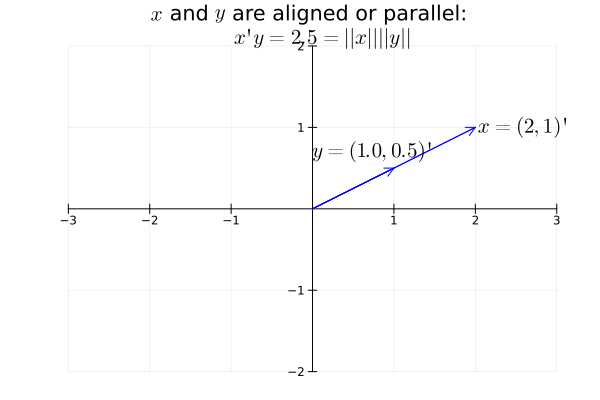

In [27]:
#| code-fold: true

x = [2, 1]
y = 0.5x

plot([0 0; x[1] y[1]], [0 0; x[2] y[2]], arrow = true, color = [:blue, :purple],
    legend = :none, xlims = (-3, 3), ylims = (-2, 2),
    annotations = [(x[1] + 0.6, x[2], L"x=(%$(x[1]), %$(x[2]))'"),
        (y[1] - 0.25, y[2] + 0.2, L"y=(%$(y[1]), %$(y[2]))'")],
    xticks = -3:1:3, yticks = -2:1:2,
    framestyle = :origin,
    aspect_ratio = :equal,
    title = L"$x$ and $y$ are aligned or parallel: 
    $x'y = %$(dot(x, y)) = \|\|x\|\| \|\|y\|\|$")

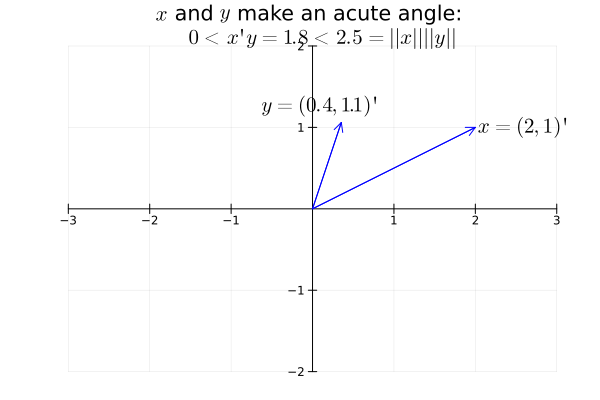

In [28]:
#| code-fold: true

x = [2, 1]
θ = π/4
A = [cos(θ) -sin(θ); sin(θ) cos(θ)]
y = 0.5(A * x)

plot([0 0; x[1] y[1]], [0 0; x[2] y[2]], arrow = true, color = [:blue, :purple],
    legend = :none, xlims = (-3, 3), ylims = (-2, 2),
    annotations = [(x[1] + 0.6, x[2], L"x=(%$(x[1]), %$(x[2]))'"),
        (y[1] - 0.25, y[2] + 0.2, L"y=(%$(round(y[1], digits=1)), %$(round(y[2], digits=1)))'")],
    xticks = -3:1:3, yticks = -2:1:2,
    framestyle = :origin,
    aspect_ratio = :equal,
    title = L"$x$ and $y$ make an acute angle: 
    $0 < x'y = %$(round(dot(x, y), digits=1)) < %$(round(norm(x) * norm(y), digits=1)) = \|\|x\|\| \|\|y\|\|$")

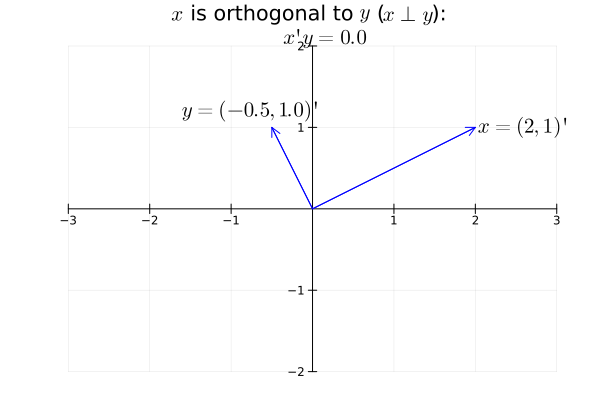

In [29]:
#| code-fold: true

x = [2, 1]
θ = π/2
A = [cos(θ) -sin(θ); sin(θ) cos(θ)]
y = 0.5(A * x)

plot([0 0; x[1] y[1]], [0 0; x[2] y[2]], arrow = true, color = [:blue, :purple],
    legend = :none, xlims = (-3, 3), ylims = (-2, 2),
    annotations = [(x[1] + 0.6, x[2], L"x=(%$(x[1]), %$(x[2]))'"),
        (y[1] - 0.25, y[2] + 0.2, L"y=(%$(round(y[1], digits=1)), %$(round(y[2], digits=1)))'")],
    xticks = -3:1:3, yticks = -2:1:2,
    framestyle = :origin,
    aspect_ratio = :equal,
    title = L"$x$ is orthogonal to $y$ ($x \perp y$): 
    $x'y = %$(round(dot(x, y), digits=1))")

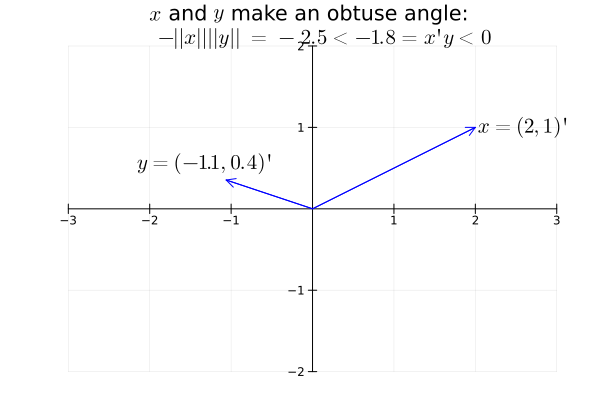

In [30]:
#| code-fold: true

x = [2, 1]
θ = (3/4)π
A = [cos(θ) -sin(θ); sin(θ) cos(θ)]
y = 0.5(A * x)

plot([0 0; x[1] y[1]], [0 0; x[2] y[2]], arrow = true, color = [:blue, :purple],
    legend = :none, xlims = (-3, 3), ylims = (-2, 2),
    annotations = [(x[1] + 0.6, x[2], L"x=(%$(x[1]), %$(x[2]))'"),
        (y[1] - 0.25, y[2] + 0.2, L"y=(%$(round(y[1], digits=1)), %$(round(y[2], digits=1)))'")],
    xticks = -3:1:3, yticks = -2:1:2,
    framestyle = :origin,
    aspect_ratio = :equal,
    title = L"$x$ and $y$ make an obtuse angle: 
    $- \|\|x\|\| \|\|y\|\| = -%$(round(norm(x) * norm(y), digits=1)) < %$(round(dot(x, y), digits=1)) = x'y < 0")

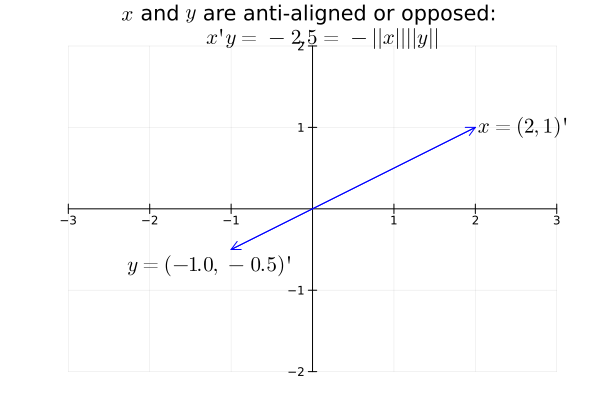

In [31]:
#| code-fold: true

x = [2, 1]
θ = π
A = [cos(θ) -sin(θ); sin(θ) cos(θ)]
y = 0.5(A * x)

plot([0 0; x[1] y[1]], [0 0; x[2] y[2]], arrow = true, color = [:blue, :purple],
    legend = :none, xlims = (-3, 3), ylims = (-2, 2),
    annotations = [(x[1] + 0.6, x[2], L"x=(%$(x[1]), %$(x[2]))'"),
        (y[1] - 0.25, y[2] - 0.2, L"y=(%$(round(y[1], digits=1)), %$(round(y[2], digits=1)))'")],
    xticks = -3:1:3, yticks = -2:1:2,
    framestyle = :origin,
    aspect_ratio = :equal,
    title = L"$x$ and $y$ are anti-aligned or opposed: 
    $x'y = %$(round(dot(x, y), digits=1)) = -\|\|x\|\| \|\|y\|\|")

## Linear independence

- Example: Consider vectors in $\mathbb{R}^3$
$$
\begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}, \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}, \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}, \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix}.
$$
The fourth vector $\begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix}$ is in some sense redundant because it can be expressed as a linear combination of the other 3 vectors
$$
\begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix} = 1 \cdot \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} + 2 \cdot \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} + 3 \cdot \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}.
$$
Similarly, each one of these 4 vectors can be expressed as the linear combination of the other 3. We say these four vectors are linearly dependent. 

- A set of vectors $\mathbf{a}_1, \ldots, \mathbf{a}_k \in \mathbb{R}^n$ are **linearly dependent** if there exist constants $\alpha_1, \ldots, \alpha_k$, which are not all zeros, such that 
$$
\alpha_1 \mathbf{a}_1 + \cdots + \alpha_k \mathbf{a}_k = \mathbf{0}.
$$
They are **linearly independent** if they are not linearly dependent. That is if $\alpha_1 \mathbf{a}_1 + \cdots + \alpha_k \mathbf{a}_k = \mathbf{0}$ then $\alpha_1 = \cdots = \alpha_k = 0$. This is usually how we show that a set of vectors are linearly independent.

- Theorem: Unit vectors $\mathbf{e}_1, \ldots, \mathbf{e}_n \in \mathbb{R}^n$ are linearly independent. 

    Proof: TODO in class.
    
- Theorem: If $\mathbf{x}$ is a linear combination of linearly independent vectors $\mathbf{a}_1, \ldots, \mathbf{a}_k$. That is $\mathbf{x} = \alpha_1 \mathbf{a}_1 + \cdots + \alpha_k \mathbf{a}_k$. Then the coefficients $\alpha_1, \ldots, \alpha_k$ are unique. 

    Proof: TODO in class. Hint: proof by contradition.
    
- **Independence-dimension inequality** or **order-dimension inequality**. If the vectors $\mathbf{a}_1, \ldots, \mathbf{a}_k \in \mathbb{R}^n$ are linearly independent, then $k \le n$.

    In words, there can be at most $n$ linearly independent vectors in $\mathbb{R}^n$. Or any set of $n+1$ or more vectors in $\mathbb{R}^n$ must linearly dependent.

    Proof (optional): We show this by induction. Let $a_1, \ldots, a_k \in \mathbb{R}^1$ be linearly independent. We must have $a_1 \ne 0$. This means that every element $a_i$ of the collection can be expressed as a multiple of $a_i = (a_i / a_1) a_1$ of the first element $a_1$. This contradicts the linear independence thus $k$ must be 1.  
    Induction hypothesis: suppose $n \ge 2$ and the independence-dimension inequality holds for $k \le n$. We partition the vectors $\mathbf{a}_i \in \mathbb{R}^n$ as
$$
    \mathbf{a}_i = \begin{pmatrix} \mathbf{b}_i \\ \alpha_i \end{pmatrix}, \quad i = 1,\ldots,k,
$$
where $\mathbf{b}_i \in \mathbb{R}^{n-1}$ and $\alpha_i \in \mathbb{R}$.  
    First suppose $\alpha_1 = \cdots = \alpha_k = 0$. Then the vectors $\mathbf{b}_1, \ldots, \mathbf{b}_k$ are linearly independent: $\sum_{i=1}^k \beta_i \mathbf{b}_i = \mathbf{0}$ if and only if $\sum_{i=1}^k \beta_i \mathbf{a}_i = \mathbf{0}$, which is only possible for $\beta_1 = \cdots = \beta_k = 0$ because the vectors $\mathbf{a}_i$ are linearly independent. The vectors $\mathbf{b}_i$ therefore form a linearly independent collection of $(n-1)$-vectors. By the induction hypothesis we have $k \le n-1$ so $k \le n$.  
    Next we assume the scalars $\alpha_i$ are not all zero. Assume $\alpha_j \ne 0$. We define a collection of $k-1$ vectors $\mathbf{c}_i$ of length $n-1$ as follows:
$$
    \mathbf{c}_i = \mathbf{b}_i - \frac{\alpha_i}{\alpha_j} \mathbf{b}_j, \quad i = 1, \ldots, j-1, \mathbf{c}_i = \mathbf{b}_{i+1} - \frac{\alpha_{i+1}}{\alpha_j} \mathbf{b}_j, \quad i = j, \ldots, k-1.
$$
These $k-1$ vectors are linealy independent: If $\sum_{i=1}^{k-1} \beta_i c_i = 0$ then
$$
    \sum_{i=1}^{j-1} \beta_i \begin{pmatrix} \mathbf{b}_i \\ \alpha_i \end{pmatrix} + \gamma \begin{pmatrix} \mathbf{b}_j \\ \alpha_j \end{pmatrix} + \sum_{i=j+1}^k \beta_{i-1} \begin{pmatrix} \mathbf{b}_i \\ \alpha_i \end{pmatrix} = \mathbf{0}
$$
with $\gamma = - \alpha_j^{-1} \left( \sum_{i=1}^{j-1} \beta_i \alpha_i + \sum_{i=j+1}^k \beta_{i-1} \alpha_i \right)$. Since the vectors $\mathbf{a}_i$ are linearly independent, all coefficients $\beta_i$ and $\gamma$ are all zero. This in turns implies that the vectors $\mathbf{c}_1, \ldots, \mathbf{c}_{k-1}$ are linearly independent. By the induction hypothesis $k-1 \le n-1$, we have established $k \le n$.

## Basis

- A set of $n$ linearly independent vectors $\mathbf{a}_1, \ldots, \mathbf{a}_n \in \mathbb{R}^n$ is called a **basis** for $\mathbb{R}^n$. 

- Fact: the zero vector $\mathbf{0}_n$ cannot be a basis vector in $\mathbb{R}^n$. Why?

- Theorem: Any vector $\mathbf{x} \in \mathbb{R}^n$ can be expressed as a linear combination of basis vectors $\mathbf{x} = \alpha_1 \mathbf{a}_1 + \cdots + \alpha_n \mathbf{a}_n$ for some $\alpha_1, \ldots, \alpha_n$, and these coefficients are unique. This is called expansion of $\mathbf{x}$ in the basis $\mathbf{a}_1, \ldots, \mathbf{a}_n$.

    Proof of existence by contradition (optional). Suppose $\mathbf{x}$ can NOT be expressed as a linear combination of basis vectors. Suppose an arbitrary linear combination $\alpha_1 \mathbf{a}_1 + \cdots + \alpha_n \mathbf{a}_n + \beta \mathbf{x} = \mathbf{0}$. Then $\beta = 0$ otherwise it contradictions with our assumption. Also $\alpha_1 = \cdots = \alpha_n = 0$ by linear independence of $\mathbf{a}_1, \ldots, \mathbf{a}_n$. Therefore we conclude $\alpha_1 = \cdots = \alpha_n = \beta = 0$. Thus $\mathbf{a}_1, \ldots, \mathbf{a}_n, \mathbf{x}$ are linearly independent, contradicting with the independence-dimension inequality.
    
    Proof of uniqueness: TODO in class.

- Example: Unit vectors $\mathbf{e}_1, \ldots, \mathbf{e}_n$ form a basis for $\mathbb{R}^n$. Expansion of a vector $\mathbf{x} \in \mathbb{R}^n$ in this basis is
$$
\mathbf{x} = x_1 \mathbf{e}_1 + \cdots + x_n \mathbf{e}_n.
$$

## Orthonormal basis

- A set of vectors $\mathbf{a}_1, \ldots, \mathbf{a}_k$ are **(mutually) orthogonal** if $\mathbf{a}_i \perp \mathbf{a}_j$ for any $i \ne j$. They are **normalized** if $\|\mathbf{a}_i\|=1$ for all $i$. They are **orthonormal** if they are both orthogonal and normalized.

    Orthonormality is often expressed compactly by $\mathbf{a}_i'\mathbf{a}_j = \delta_{ij}$, where 
$$
\delta_{ij} = \begin{cases} 
1 & \text{if } i = j \\ 
0 & \text{if } i \ne j 
\end{cases}
$$
is the Kronecker delta notation.

- Theorem: An orthonormal set of vectors are linearly independent.

    Proof: TODO in class. Expand $\|\alpha_1 \mathbf{a}_1 + \cdots + \alpha_k \mathbf{a}_k\|^2 = (\alpha_1 \mathbf{a}_1 + \cdots + \alpha_k \mathbf{a}_k)'(\alpha_1 \mathbf{a}_1 + \cdots + \alpha_k \mathbf{a}_k)$.
    
- By the independence-dimension inequality, must have $k \le n$. When $k=n$, $\mathbf{a}_1, \ldots, \mathbf{a}_n$ are called an **orthonormal basis**. 

- Examples of orthonormal basis:

    1. Unit vectors $\mathbf{e}_1, \ldots, \mathbf{e}_n$ in $\mathbb{R}^n$.  
    2. The 3 vectors in $\mathbb{R}^3$:
$$
\begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}, \quad \frac{1}{\sqrt 2} \begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}, \quad \quad \frac{1}{\sqrt 2} \begin{pmatrix} 1 \\ -1 \\ 0 \end{pmatrix}.
$$

In [32]:
a1 = [0, 0, 1]
a2 = (1 / sqrt(2)) * [1, 1, 0]
a3 = (1 / sqrt(2)) * [1, -1, 0]
@show norm(a1), norm(a2), norm(a3)
@show a1'a2, a1'a3, a2'a3

(norm(a1), norm(a2), norm(a3)) = (1.0, 0.9999999999999999, 0.9999999999999999)
(a1' * a2, a1' * a3, a2' * a3) = (0.0, 0.0, -2.2371143170757382e-17)


(0.0, 0.0, -2.2371143170757382e-17)

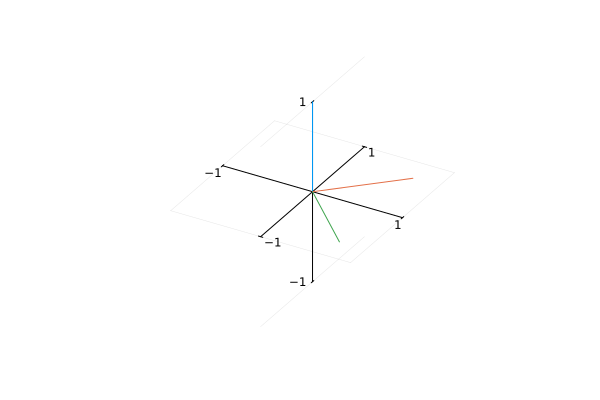

In [33]:
#| code-fold: true

plot3d([0; a1[1]], [0; a1[2]], [0; a1[3]], 
    arrow = true, legend = :none,
    framestyle = :origin,
    aspect_ratio = :equal,
    xlims = (-1, 1), ylims = (-1, 1), zlims = (-1, 1),
    xticks = -1:1:1, yticks = -1:1:1, zticks = -1:1:1
)
plot3d!([0; a2[1]], [0; a2[2]], [0; a2[3]])
plot3d!([0; a3[1]], [0; a3[2]], [0; a3[3]])

- **Orthonormal expansion**. If $\mathbf{a}_1, \ldots, \mathbf{a}_n \in \mathbb{R}^n$ is an orthonormal basis, then for any vector $\mathbf{x} \in \mathbb{R}^n$, 
$$
\mathbf{x} = (\mathbf{a}_1'\mathbf{x}) \mathbf{a}_1 + \cdots + (\mathbf{a}_n'\mathbf{x}) \mathbf{a}_n.
$$

    Proof: $\mathbf{x} = \mathbf{A} \mathbf{A}' \mathbf{x}$.

In [34]:
@show x = randn(3)
@show (a1'x) * a1 + (a2'x) * a2 + (a3'x) * a3
@show x ≈ (a1'x) * a1 + (a2'x) * a2 + (a3'x) * a3

x = randn(3) = [0.06883241218816398, 1.1667140055410046, 0.8357329421287591]
(a1' * x) * a1 + (a2' * x) * a2 + (a3' * x) * a3 = [0.06883241218816394, 1.1667140055410044, 0.8357329421287591]
x ≈ (a1' * x) * a1 + (a2' * x) * a2 + (a3' * x) * a3 = true


true

## How to orthonormalize a set of vectors? Gram-Schmidt algorithm

- Given vectros $\mathbf{a}_1, \ldots, \mathbf{a}_k \in \mathbb{R}^n$. G-S algorithm generates a sequence of orthonormal vectors $\mathbf{q}_1, \mathbf{q}_2, \ldots$.

- For $i=1,\ldots,k$:  

    1. Orthogonalization: $\tilde{\mathbf{q}}_i = \mathbf{a}_i - [(\mathbf{q}_1' \mathbf{a}_i) \mathbf{q}_1 + \cdots + (\mathbf{q}_{i-1}' \mathbf{a}_i) \mathbf{q}_{i-1}]$.  
    
    2. Test for linear independence: if $\tilde{\mathbf{q}}_i = \mathbf{0}$, quit.  
    
    3. Normalization: $\mathbf{q}_i = \tilde{\mathbf{q}}_i / \|\tilde{\mathbf{q}}_i\|$.
    
- If G-S does not stop early (in step 2), $\mathbf{a}_1, \ldots, \mathbf{a}_k$ are linearly independent. 

- If G-S stops early in iteration $i=j$, then $\mathbf{a}_j$ is a linear combination of $\mathbf{a}_1, \ldots, \mathbf{a}_{j-1}$ and $\mathbf{a}_1, \ldots, \mathbf{a}_{j-1}$ are linearly independent.

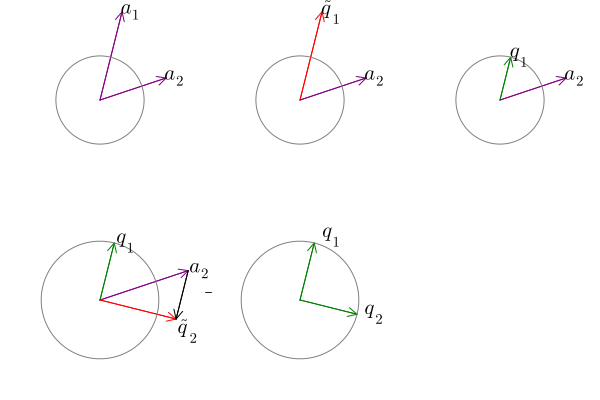

In [35]:
#| code-fold: true

a1 = [0.5, 2]
a2 = [1.5, 0.5]

p1 = plot([0 0; a1[1] a2[1]], [0 0; a1[2] a2[2]], arrow = true, color = :purple,
    axis = ([], false), legend = :none,
    xlims = (-2, 2), ylims = (-2, 2),
    annotations = [(a1[1] + 0.2, a1[2], L"a_1"),
        (a2[1] + 0.2, a2[2], L"a_2")],
    framestyle = :origin,
    aspect_ratio = :equal)
t = 0:0.01:2π
plot!(p1, sin.(t), cos.(t), color = :gray)

# orthogonalizing a1
q̃1 = copy(a1) 
p2 = plot([0 0; q̃1[1] a2[1]], [0 0; q̃1[2] a2[2]], arrow = true, color = [:red :purple],
    axis = ([], false), legend = :none,
    xlims = (-2, 2), ylims = (-2, 2),
    annotations = [(q̃1[1] + 0.2, q̃1[2], L"\tilde{q}_1"),
        (a2[1] + 0.2, a2[2], L"a_2")],
    framestyle = :origin,
    aspect_ratio = :equal)
t = 0:0.01:2π
plot!(p2, sin.(t), cos.(t), color = :gray)

# normalizing q̃1
q1 = q̃1 / norm(q̃1) 
p3 = plot([0 0; q1[1] a2[1]], [0 0; q1[2] a2[2]], arrow = true, color = [:green :purple],
    axis = ([], false), legend = :none,
    xlims = (-2, 2), ylims = (-2, 2),
    annotations = [(q1[1] + 0.2, q1[2], L"q_1"),
        (a2[1] + 0.2, a2[2], L"a_2")],
    framestyle = :origin,
    aspect_ratio = :equal)
t = 0:0.01:2π
plot!(p3, sin.(t), cos.(t), color = :gray)

# orthogonalizing a2
q̃2 = a2 - dot(a2, q1) * q1
p4 = plot([0 0 0; q1[1] a2[1] q̃2[1]], [0 0 0; q1[2] a2[2] q̃2[2]], 
    arrow = true, color = [:green :purple :red],
    xlims = (-1.5, 1.5), ylims = (-1.5, 1.5),
    axis = ([], false), legend = :none,
    annotations = [
        (q1[1] + 0.2, q1[2], L"q_1"),
        (a2[1] + 0.2, a2[2], L"a_2"),
        (q̃2[1] + 0.2, q̃2[2] - 0.2, L"\tilde{q}_2"),
        ((a2[1] + q̃2[1]) / 2 + 1.2, (a2[2] + q̃2[2]) / 2, L"-(q_1' a_2)q_1")
        ],
    framestyle = :origin,
    aspect_ratio = :equal)
t = 0:0.01:2π
plot!(p4, sin.(t), cos.(t), color = :gray)
plot!(p4, [a2[1]; q̃2[1]], [a2[2]; q̃2[2]], arrow = true, color = :black)

# normalizing q̃2
q2 = q̃2 / norm(q̃2) 
p5 = plot([0 0; q1[1] q2[1]], [0 0; q1[2] q2[2]], arrow = true, color = :green,
    axis = ([], false), legend = :none,
    xlims = (-1.5, 1.5), ylims = (-1.5, 1.5),
    annotations = [(q1[1] + 0.3, q1[2] + 0.1, L"q_1"),
        (q2[1] + 0.3, q2[2], L"q_2")],
    framestyle = :origin,
    aspect_ratio = :equal)
t = 0:0.01:2π
plot!(p5, sin.(t), cos.(t), color = :gray)

plot(p1, p2, p3, p4, p5)

In [36]:
# n = 5, k = 3
@show a1 = randn(5)
@show a2 = randn(5)
@show a3 = randn(5);

a1 = randn(5) = [0.2885564877647501, -0.19224518245702288, 0.9760800611438696, 0.4733438594803039, 1.3185865361572564]
a2 = randn(5) = [1.0954320572270426, 0.8364643340255031, 0.19913228607643202, -0.9166426768675935, 1.059278178644525]
a3 = randn(5) = [-0.2410533432190306, -0.8816067116410236, -0.8360997587997916, 0.4564048993818573, -1.5563970410387786]


In [37]:
# for i = 1
# orthogonalization
@show q̃1 = copy(a1)
# test for linear independence
@show norm(q̃1) ≈ 0
# normalization
@show q1 = q̃1 / norm(q̃1);

q̃1 = copy(a1) = [0.2885564877647501, -0.19224518245702288, 0.9760800611438696, 0.4733438594803039, 1.3185865361572564]
norm(q̃1) ≈ 0 = false
q1 = q̃1 / norm(q̃1) = [0.16561620692378157, -0.11033859666277747, 0.560218481423893, 0.27167441350929794, 0.7567991359708033]


In [38]:
# for i = 2
# orthogonalization
@show q̃2 = a2 - (q1'a2) * q1
# test for linear independence
@show norm(q̃2) ≈ 0
# normalization
@show q2 = q̃2 / norm(q̃2);

q̃2 = a2 - (q1' * a2) * q1 = [0.9706705469299335, 0.9195842787423083, -0.22288984048370447, -1.1212996411108334, 0.48916849584809674]
norm(q̃2) ≈ 0 = false
q2 = q̃2 / norm(q̃2) = [0.5315958173521265, 0.5036179966810818, -0.12206747933804651, -0.6140890965510944, 0.26789720487114965]


In [39]:
# for i = 3
# orthogonalization
@show q̃3 = a3 - (q1'a3) * q1 - (q2'a3) * q2
# test for linear independence
@show norm(q̃3) ≈ 0
# Normalization
@show q3 = q̃3 / norm(q̃3);

q̃3 = (a3 - (q1' * a3) * q1) - (q2' * a3) * q2 = [0.6220965646602881, -0.4553704306380575, -0.15790750149769647, 0.13756137221759512, -0.13502051895298534]
norm(q̃3) ≈ 0 = false
q3 = q̃3 / norm(q̃3) = [0.7678128636064446, -0.5620337648719156, -0.19489484076494357, 0.1697829519147096, -0.16664694388648787]


In [40]:
# test for orthonormality of q1, q2, q3
@show norm(q1), norm(q2), norm(q3)
@show q1'q2, q1'q3, q2'q3;

(norm(q1), norm(q2), norm(q3)) = (1.0, 1.0, 1.0)
(q1' * q2, q1' * q3, q2' * q3) = (-5.726567863811328e-17, -2.057485130848294e-16, -2.833517589947109e-16)


Show by induction that $\mathbf{q}_1, \ldots, \mathbf{q}_i$ are orthonormal (optional):

- Assume it's true for $i-1$. 

- Orthogonalization step ensures that $\tilde{\mathbf{q}}_i \perp \mathbf{q}_1, \ldots, \tilde{\mathbf{q}}_i \perp \mathbf{q}_{i-1}$. To show this, take inner product of both sides with $\mathbf{q}_j$, $j < i$
$$
\mathbf{q}_j' \tilde{\mathbf{q}}_i = \mathbf{q}_j' \mathbf{a}_i - (\mathbf{q}_1' \mathbf{a}_i) (\mathbf{q}_j' \mathbf{q}_1) - \cdots - (\mathbf{q}_{i-1}' \mathbf{a}_i) (\mathbf{q}_j' \mathbf{q}_{i-1}) = \mathbf{q}_j' \mathbf{a}_i - \mathbf{q}_j' \mathbf{a}_i = 0.
$$

- So $\mathbf{q}_1, \ldots, \mathbf{q}_i$ are orthogonal. The normalization step ensures $\mathbf{q}_i$ is normal.

Suppose G-S has not terminated by iteration $i$, then 

- $\mathbf{a}_i$ is a combination of $\mathbf{q}_1, \ldots, \mathbf{q}_i$, and

- $\mathbf{q}_i$ is a combination of $\mathbf{a}_1, \ldots, \mathbf{a}_i$.

Computational complexity of G-S algorithm:

- Step 1 of iteration $i$ requires (1) $i-1$ inner products, $\mathbf{q}_1' \mathbf{a}_i, \ldots, \mathbf{q}_{i-1}' \mathbf{a}_i$, which costs $(i-1)(2n-1)$ flops, (2) $2n(i-1)$ flops to compute $\tilde{\mathbf{q}}_i$

- Step 2 of iteration $i$ requires less than $n$ flops.  

- Step 3 of iteration $i$ requires $3n$ flops to normalize $\|\tilde{\mathbf{q}}_i\|$. 

- Assuming no early termination, total computational cost of the GS algorithm to orthonormalize a set of $k$ vectors in $\mathbb{R}^n$ is:
$$
\sum_{i=1}^k [(4n-1) (i - 1) + 3n] = (4n - 1) \frac{k(k-1)}{2} + 3nk \approx 2nk^2 = O(nk^2),
$$
using $\sum_{i=1}^k (i - 1) = k(k-1)/2$. 